<a href="https://colab.research.google.com/github/SanePai/SSA/blob/main/SSA_Basic_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/'My Drive'/SSA/
!ls

/content/drive/My Drive/SSA
EEG_epochs_sample.npy  y_categories_sample.npy


In [ ]:
import numpy as np
from numpy import pi
import pandas as pd
import random
from numpy import linalg
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy.signal import butter, filtfilt

In [ ]:
def build_traj_mat(ts, L=None):
    N = len(ts) #Length of realization
    if L is None: #Window Length
        L = int((N/2) - 1)
    K = N-L+1 #Number of columns in the traj matrix
    X = np.column_stack([ts[i:i+L] for i in range(K)])
    return X
def svd_(X):
    d = np.linalg.matrix_rank(X)
    U,s,vh = np.linalg.svd(X)
    E = np.diag(s)
    V = np.transpose(vh)
    return d, s, U, E, V

def elem_matrices(X, d, show = False):
    X_elem = np.array( [s[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)] )
    if show:
        elem_mat_show(X_elem, d)
    return X_elem

def elem_mat_show(X_elem, d):
    for i in range(d):
        plt.matshow(X_elem[i])

def plot_contributions(s):
    plt.figure(figsize = (30,20))
    plt.plot(range(len(s)),s,'red')
    for a,b in zip(range(len(s)),s):
        plt.text(a,b,str(b))
    plt.show()

def X_to_TS(X):
    X_rev = np.fliplr(X)
    m,n = np.shape(X)
    x = np.array([X_rev.diagonal(i).mean() for i in range(-m+1, n)])
    return x[::-1]

In [ ]:
#Read Data
!ls
ts = np.load('EEG_epochs_sample.npy')
m,n,p = np.shape(ts)
print(m,n,p)

EEG_epochs_sample.npy  y_categories_sample.npy
1200 550 32


In [ ]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

fs = 500
cutoff = 0.5
filter_order = 3

for i in range(m):
    for j in range(p):
        print(f'Channel{j} in trial{i}')
        channelj_triali = []
        for k in range(n):
            channelj_triali.append(ts[j][k][i])
        channelj_triali = butter_highpass_filter(channelj_triali, cutoff, fs, filter_order)
        channelj_triali = (channelj_triali - np.mean(channelj_triali))/np.std(channelj_triali)



[-0.7322519  -0.37864438 -0.1755384  -0.03901258 -0.04954524 -0.4874478
 -1.80446068 -3.06554268 -2.50174746 -1.37060337 -0.82104319 -0.42542684
 -0.33108275 -0.46441834 -0.67824846 -1.37898169 -1.95722017 -1.92593338
 -1.78262392 -2.08777127 -1.19149689 -0.3793029  -0.06089733 -0.18047604
 -0.25445139 -1.09191075 -1.90829744 -1.90886948 -1.23679511 -0.65238689
 -0.22909382  0.38325837  0.06055467 -0.58795054 -0.92474217 -1.17045428
 -1.49680267 -2.59710635 -2.37706249 -1.45668446 -0.90743922 -0.52633753
 -0.71950105 -0.41904904 -0.5108174  -1.22605584 -2.27039418 -2.45329749
 -1.64493869 -0.84720896 -0.89702594  0.02318806  0.52679498  0.57850493
  0.11534116 -0.26362725 -0.67431205 -0.75577981 -1.11742821 -0.87657721
  0.0925835   0.70467184  0.73518047  0.54518626 -0.19841371 -0.82267092
 -0.75720735 -0.59004585 -1.18292182 -1.15593942 -0.52301373 -0.07931694
  0.73921697  0.96928629 -0.29258985 -1.31992782 -1.36303055 -1.03832502
 -0.74533394 -0.343758   -0.28878054 -0.09021497  0.

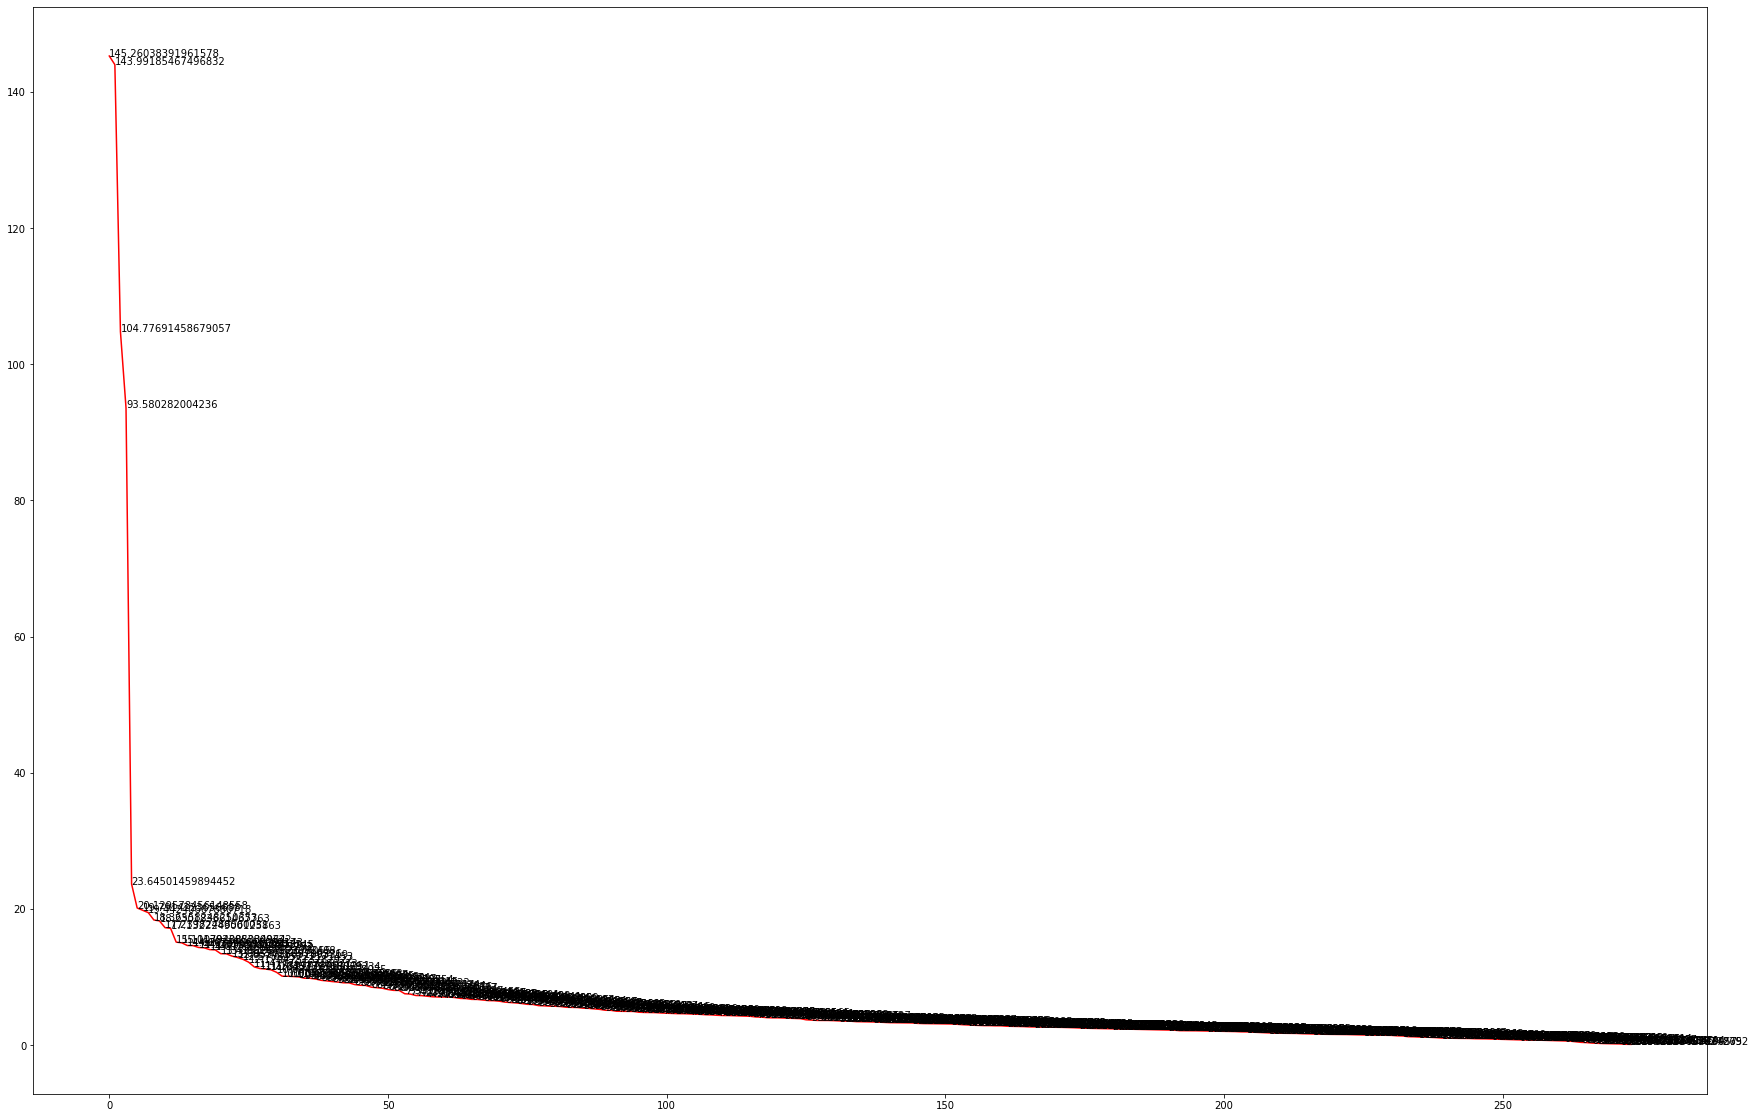

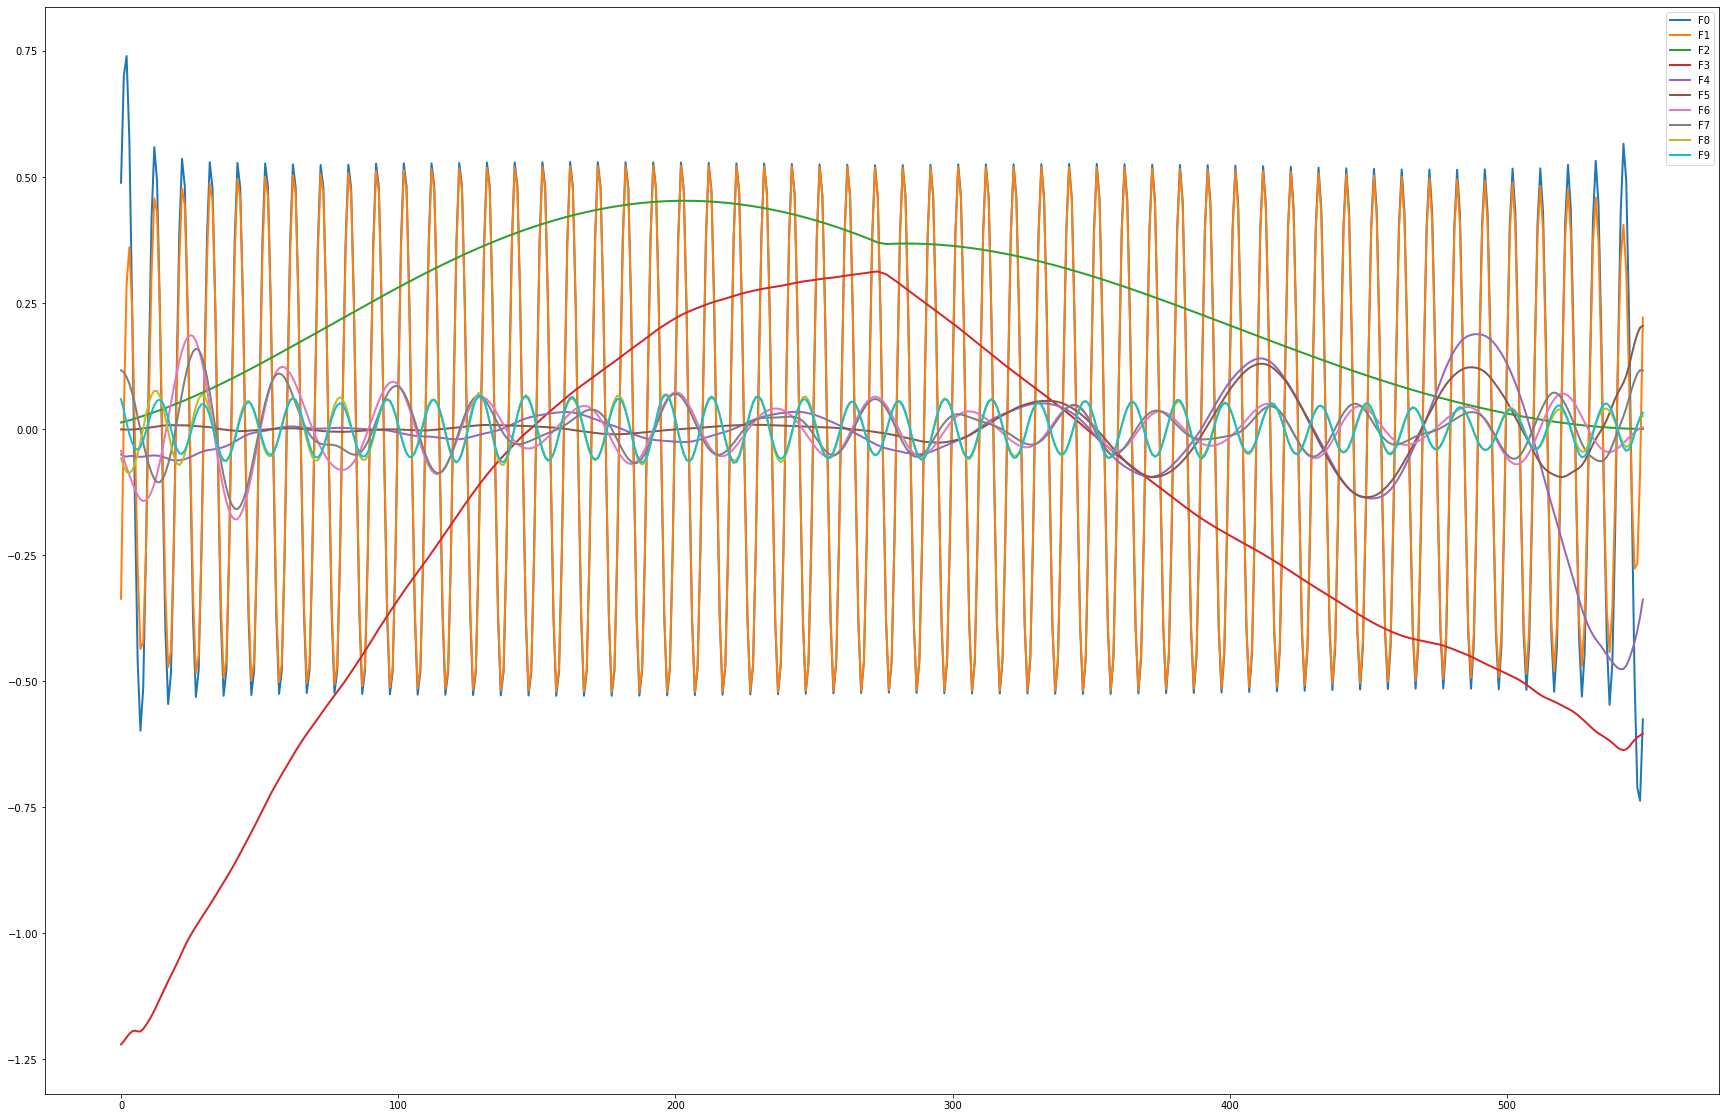

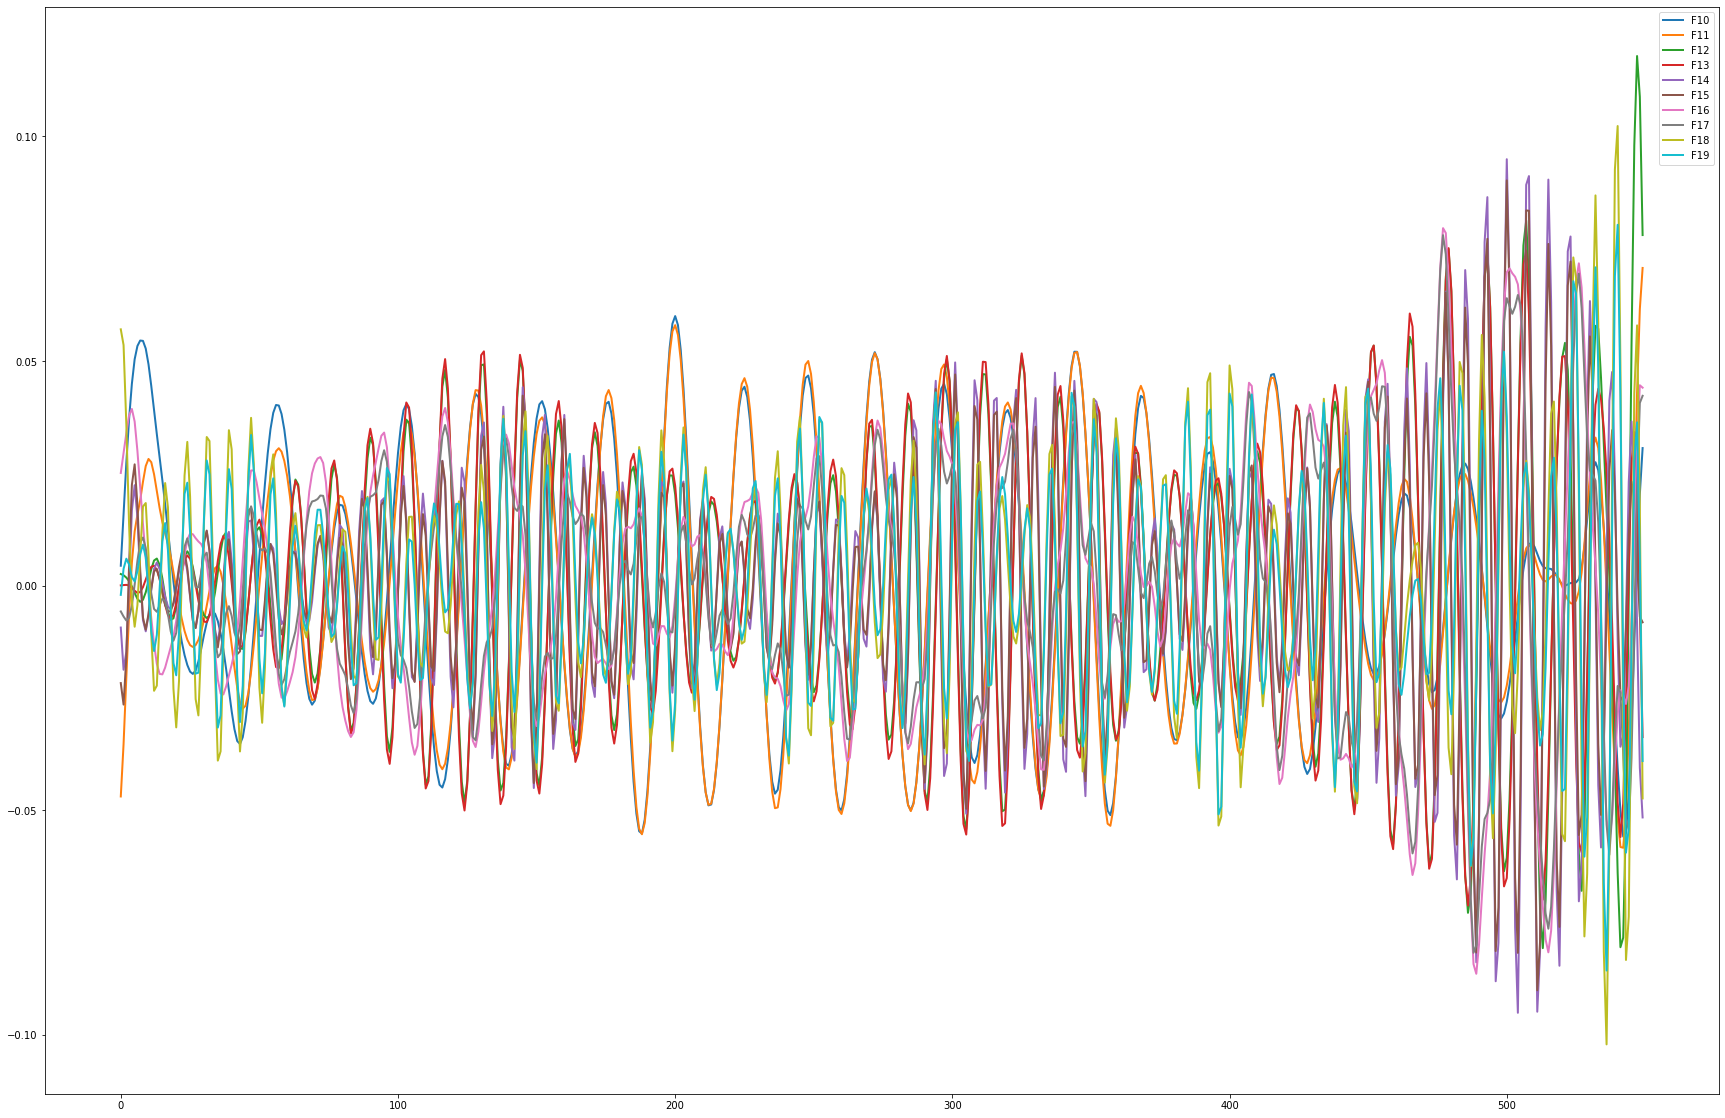

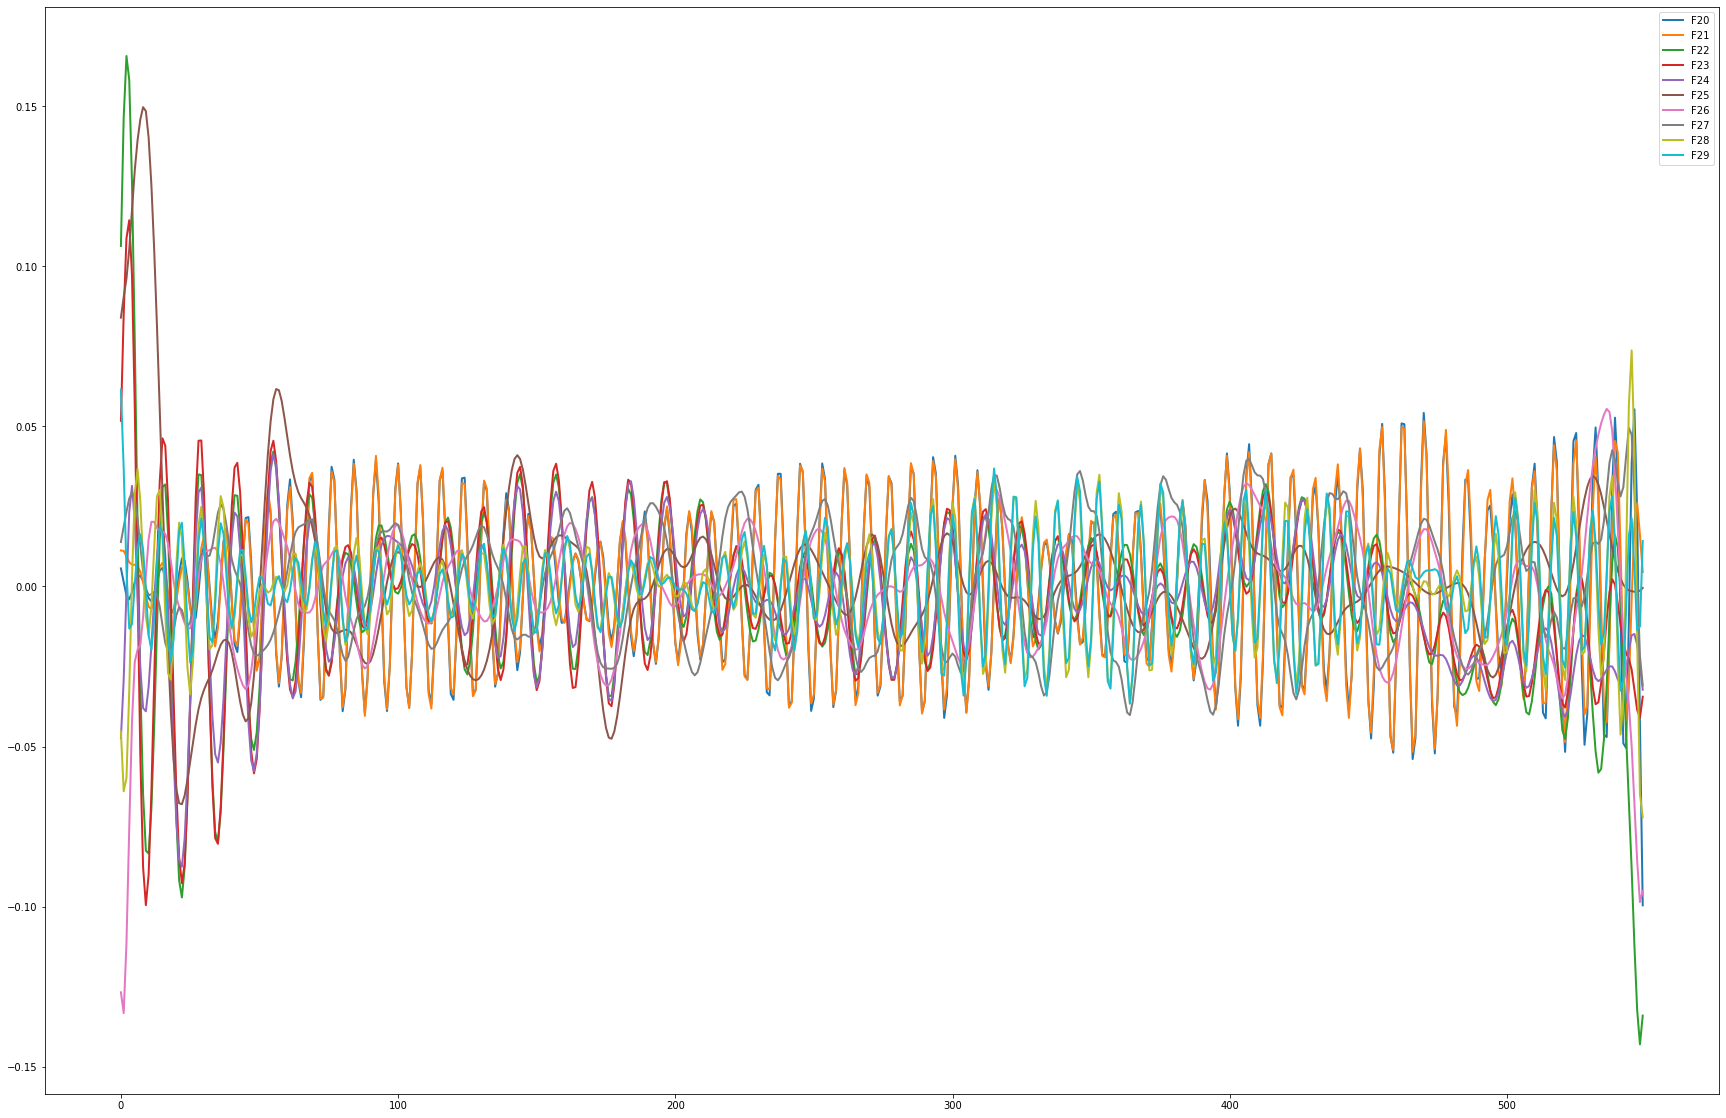

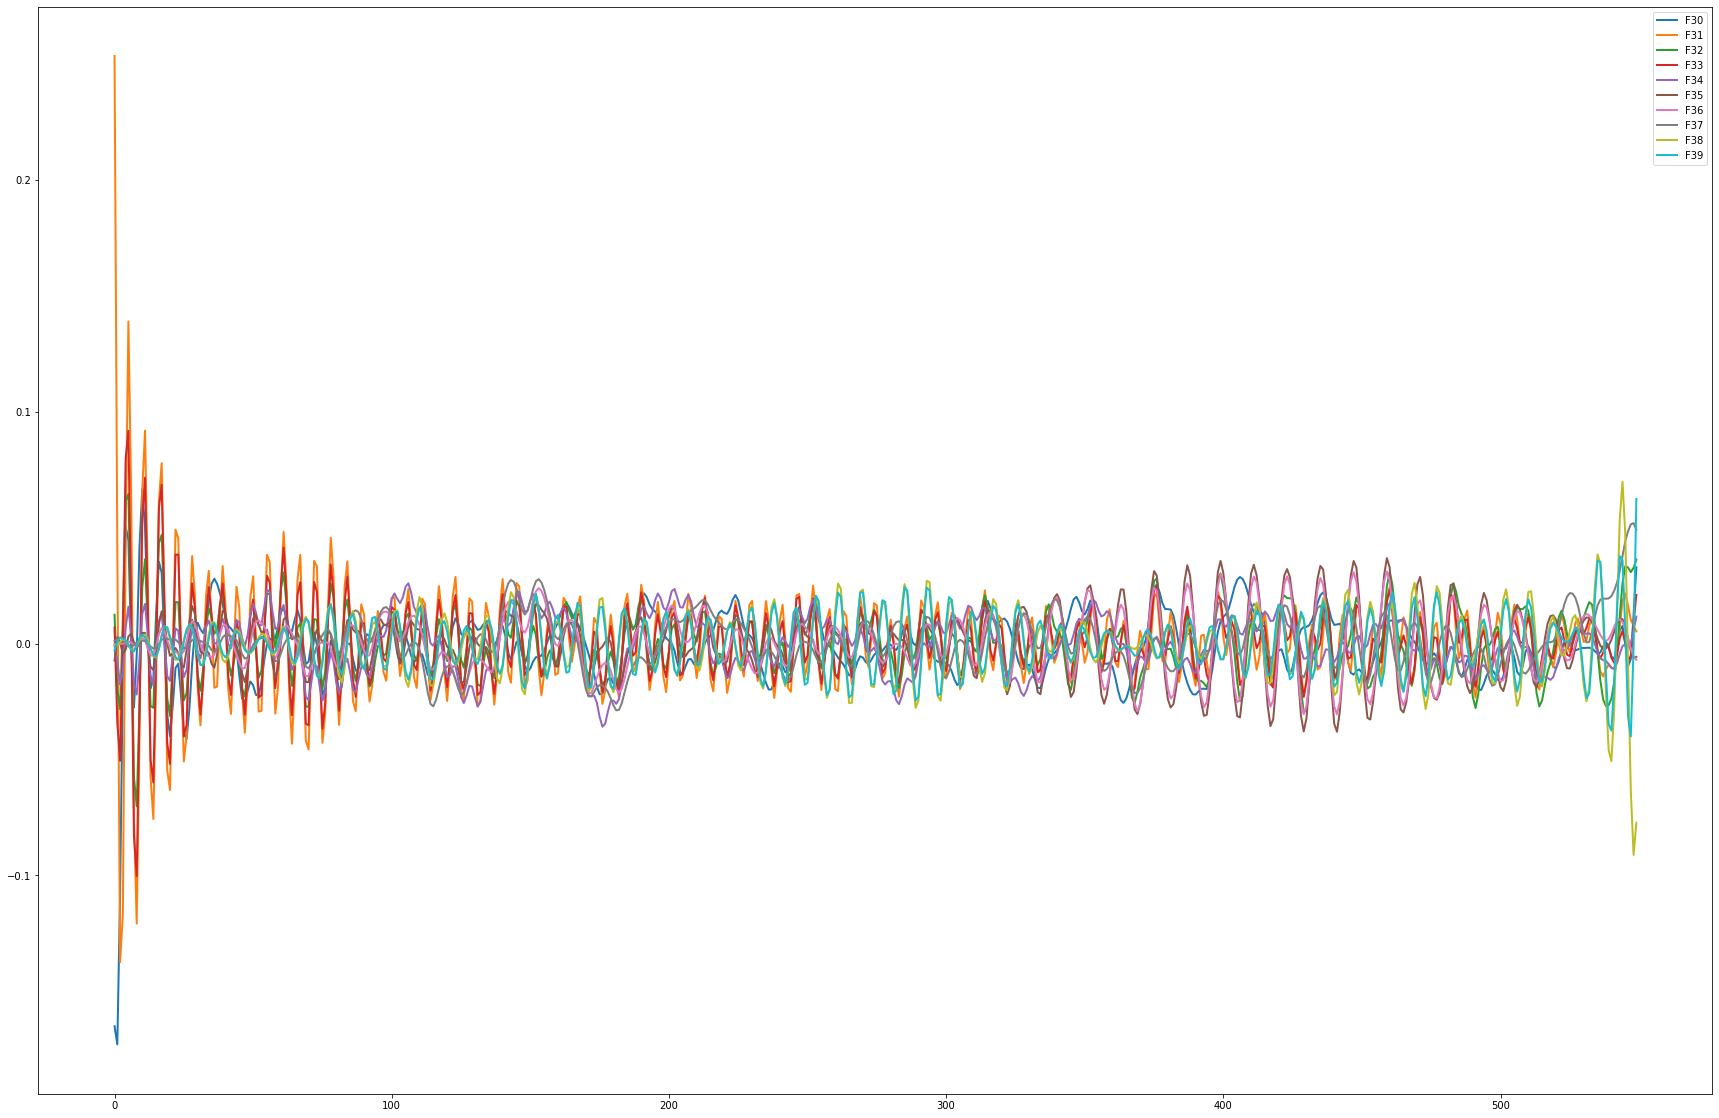

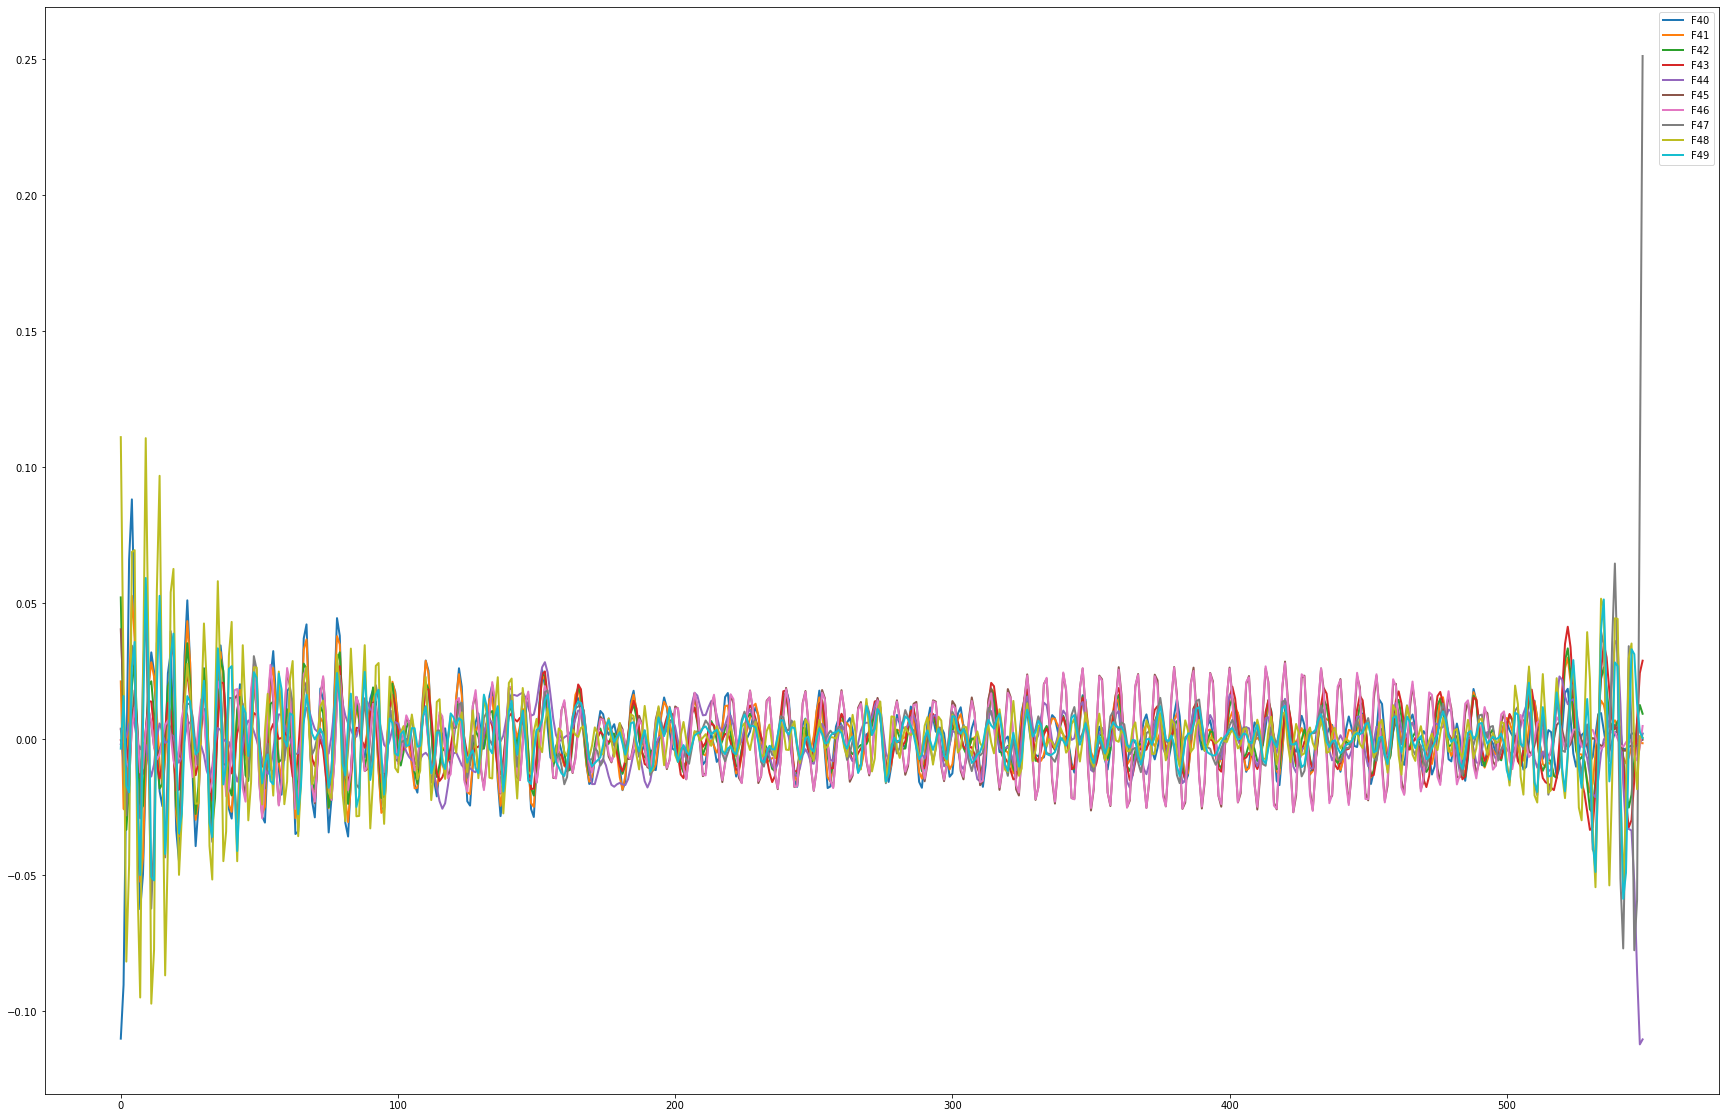

In [ ]:
#Channel1 in all samples in trial 1 (to be iterated 32 times and then 1200 times)(1200*32*5*[550])
channel1_trial1 = []
for i in range(n):
    channel1_trial1.append(ts[0][i][0])

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

channel1_trial1 = butter_highpass_filter(channel1_trial1, 0.5, 500, 3)
channel1_trial1 = (channel1_trial1 - np.mean(channel1_trial1))/np.std(channel1_trial1)
print(channel1_trial1)
print(len(channel1_trial1))
X = build_traj_mat(channel1_trial1) #Trajectory matrix
print(X)
d, s, U, E, V = svd_(X) #SVD
X_elem = elem_matrices(X, d) #Elementary matrices
plot_contributions(s)

#Plot reconstructed signals from elementary matices (Checking before grouping)
plt.figure(figsize = (30,20))
for i in range(10):
    F = X_to_TS(X_elem[i])
    plt.plot(range(len(F)), F, lw = 2, label = f'F{i}')
plt.legend()

plt.figure(figsize = (30,20))
for i in range(10, 20):
    F = X_to_TS(X_elem[i])
    plt.plot(range(len(F)), F, lw = 2, label = f'F{i}')
plt.legend()

plt.figure(figsize = (30,20))
for i in range(20, 30):
    F = X_to_TS(X_elem[i])
    plt.plot(range(len(F)), F, lw = 2, label = f'F{i}')
plt.legend()

plt.figure(figsize = (30,20))
for i in range(30, 40):
    F = X_to_TS(X_elem[i])
    plt.plot(range(len(F)), F, lw = 2, label = f'F{i}')
plt.legend()

plt.figure(figsize = (30,20))
for i in range(40, 50):
    F = X_to_TS(X_elem[i])
    plt.plot(range(len(F)), F, lw = 2, label = f'F{i}')
plt.legend()

In [ ]:
len(F)

550

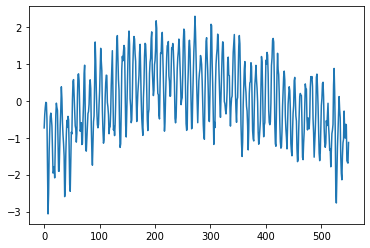

In [ ]:
plt.plot(channel1_trial1)

[-16662.455078125, -16612.388671875, -16584.875, -16525.603515625, -16477.728515625, -16405.822265625, -16342.7841796875, -16277.1240234375, -16209.794921875, -16127.1591796875, -16103.6025390625, -16049.43359375, -15991.640625, -15970.5654296875, -15906.8603515625, -15857.984375, -15791.3701171875, -15772.7734375, -15693.6181640625, -15627.8154296875, -15568.6865234375, -15522.9580078125, -15478.1826171875, -15427.876953125, -15352.2978515625, -15310.9560546875, -15216.54296875, -15172.1005859375, -15141.2978515625, -15046.4072265625, -15001.1083984375, -14970.3994140625, -14925.337890625, -14860.0107421875, -14822.580078125, -14754.3916015625, -14715.625, -14635.0400390625, -14601.56640625, -14535.76171875, -14481.736328125, -14438.5830078125, -14391.7099609375, -14337.875, -14297.916015625, -14224.2919921875, -14179.421875, -14111.4716796875, -14096.9287109375, -14045.9072265625, -13541.556640625, -13473.1298828125, -13417.4833984375, -13402.5576171875, -13363.6962890625, -13382.340

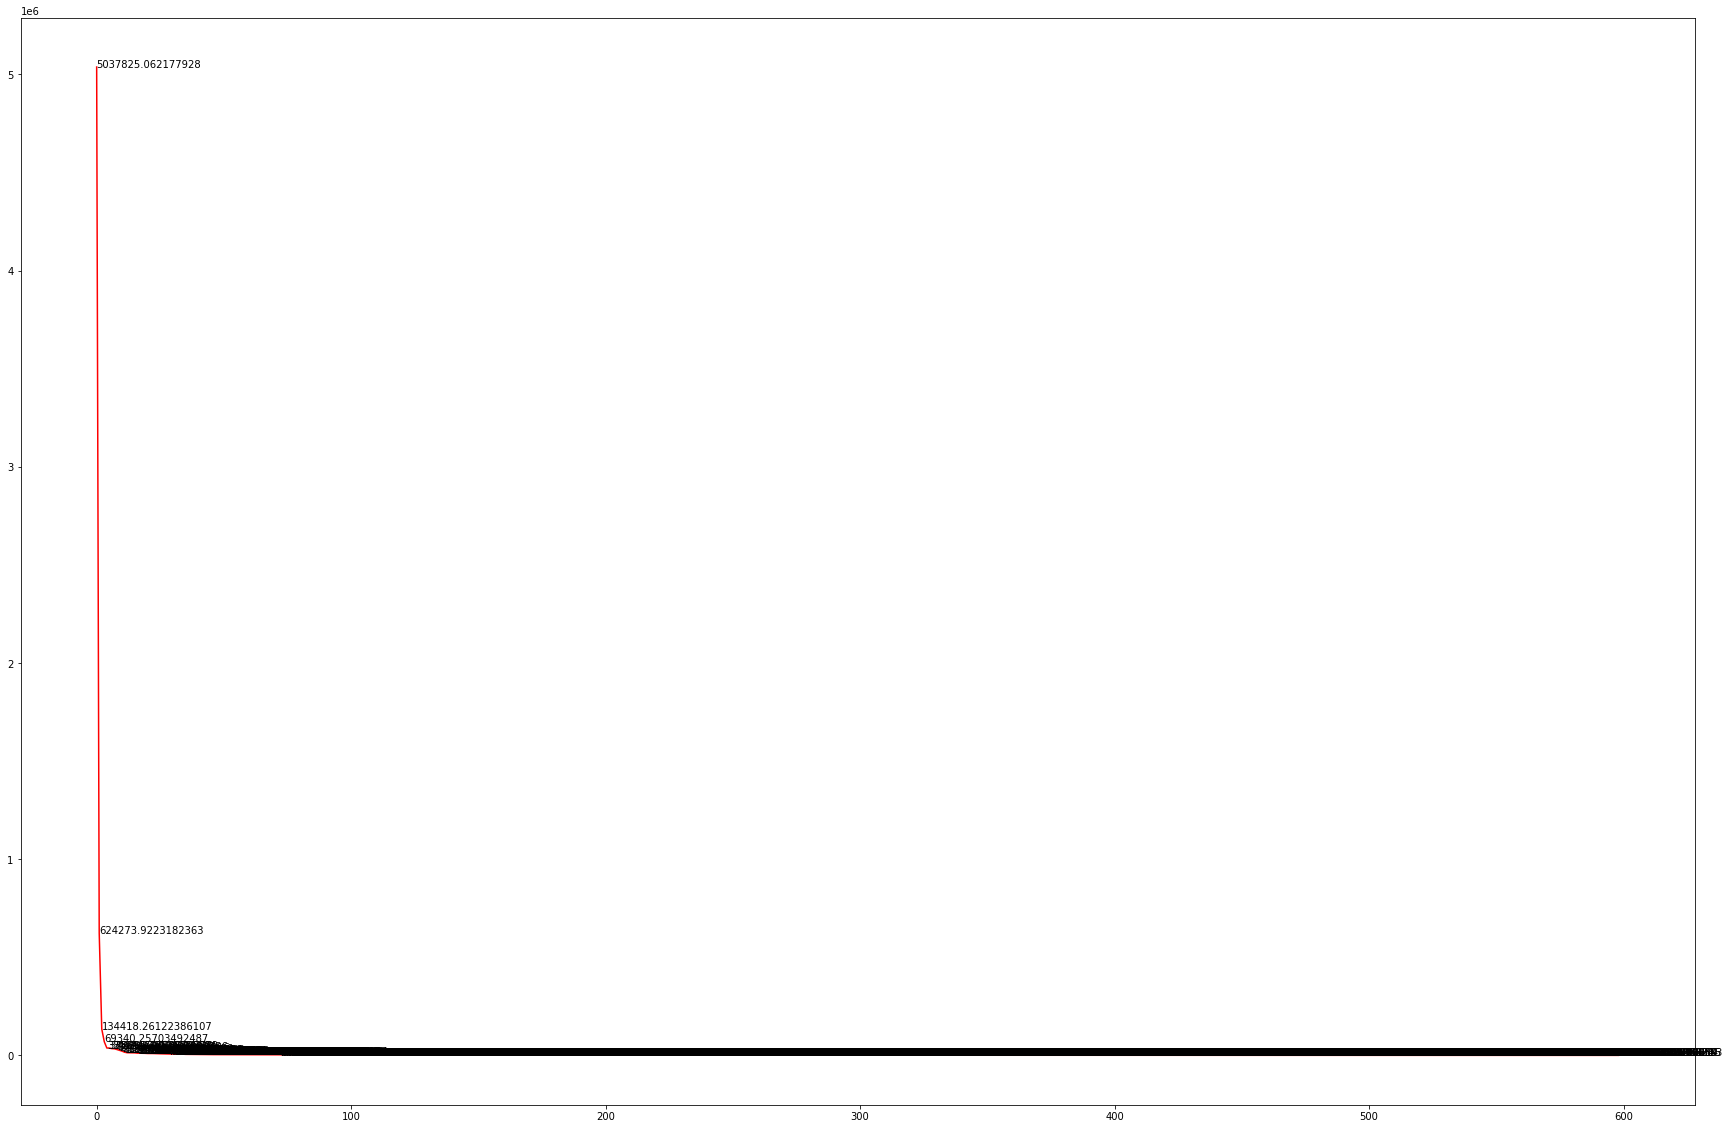

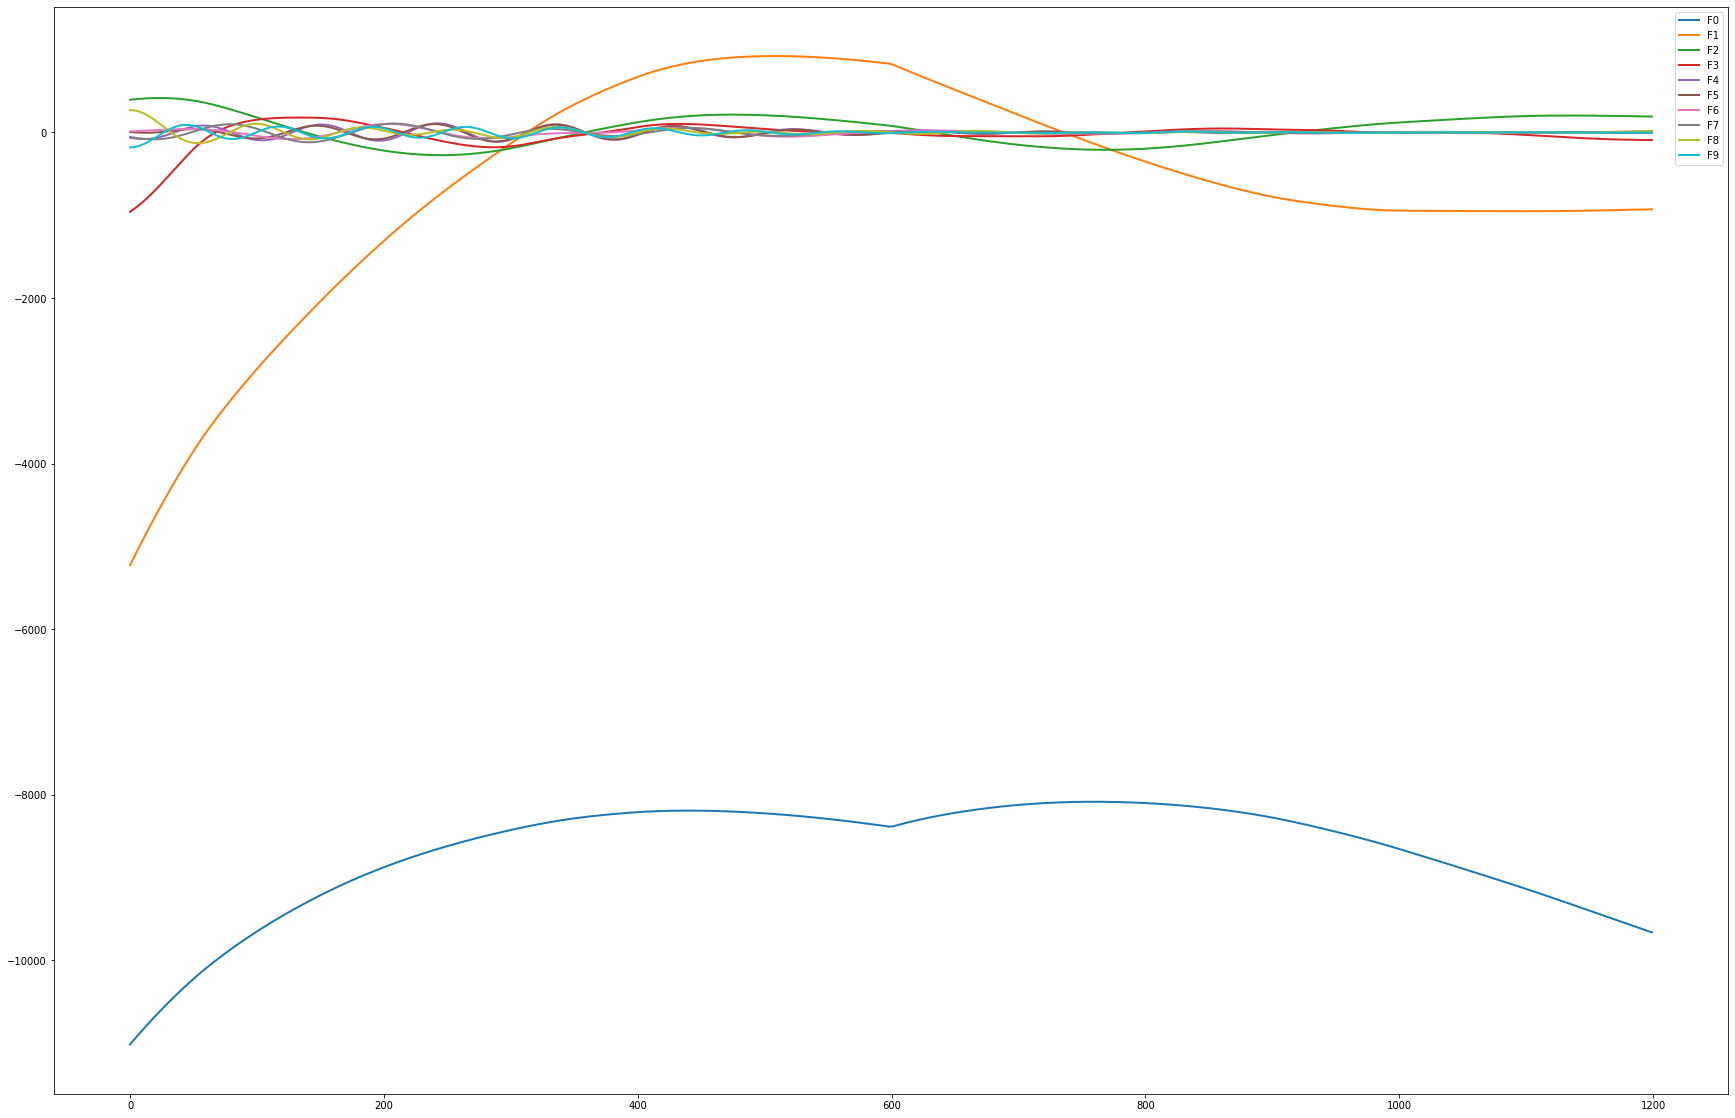

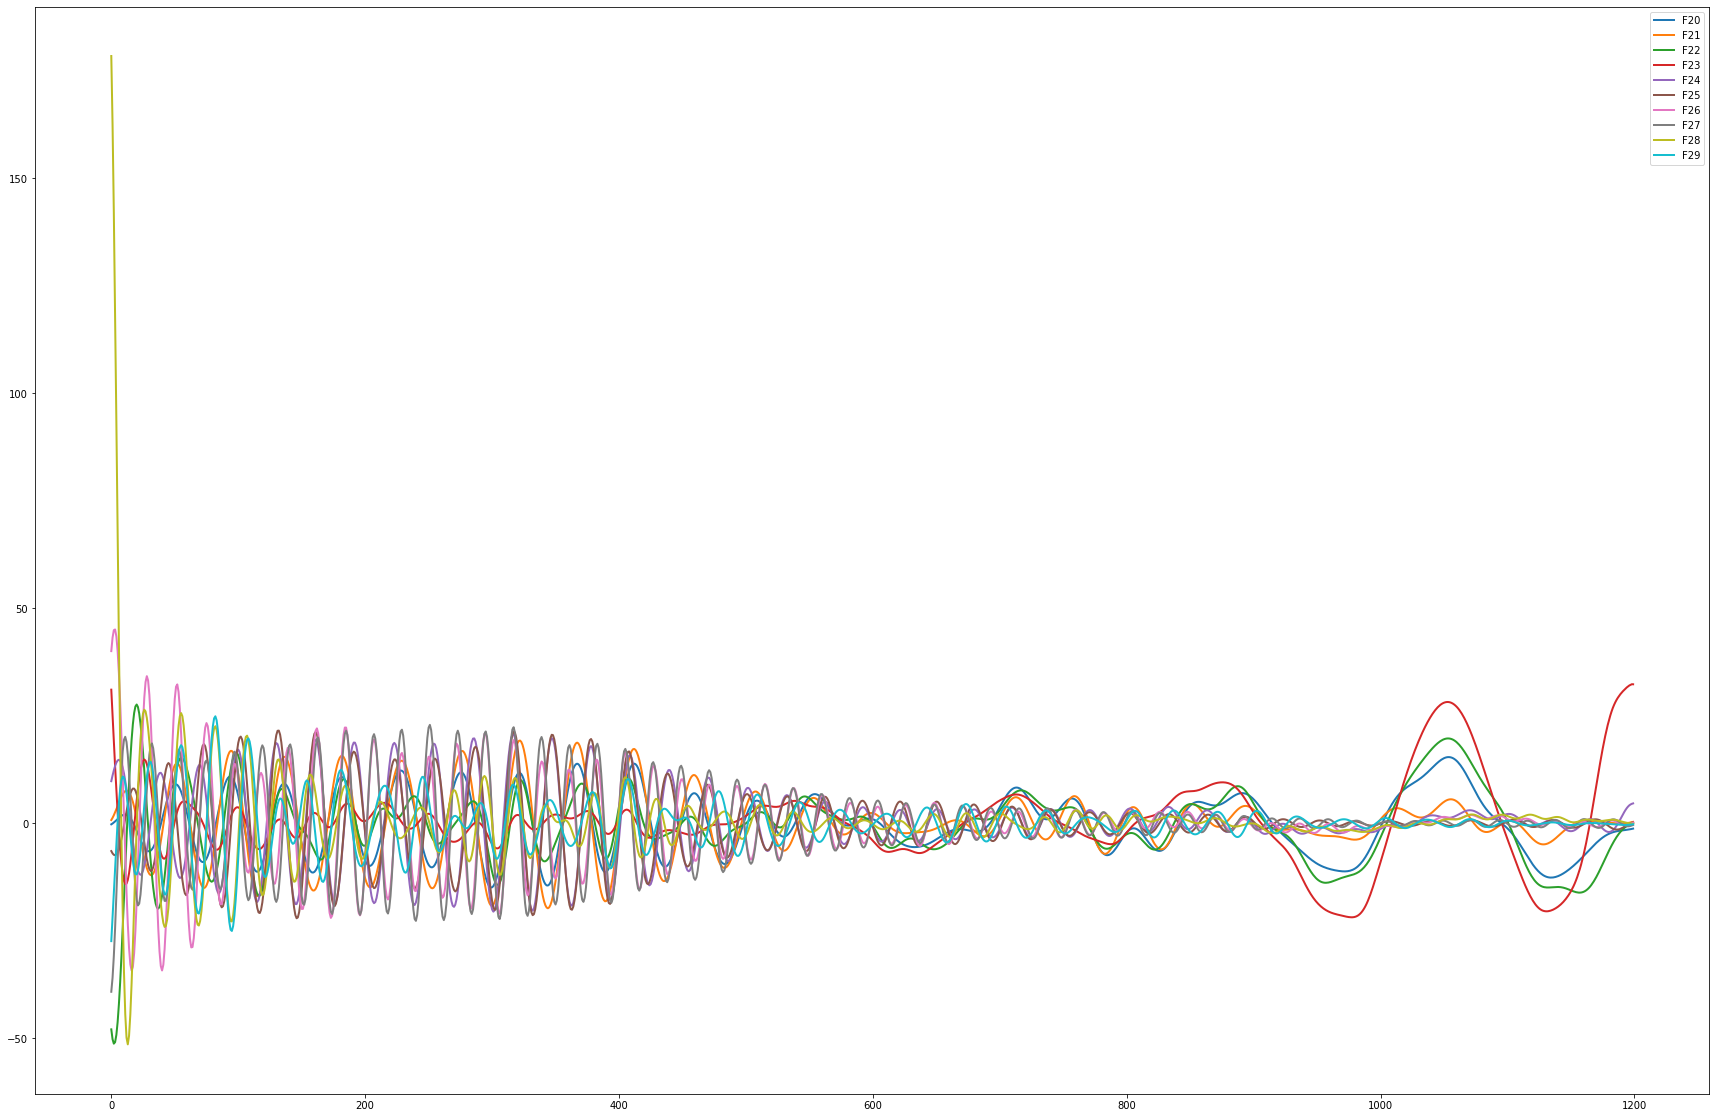

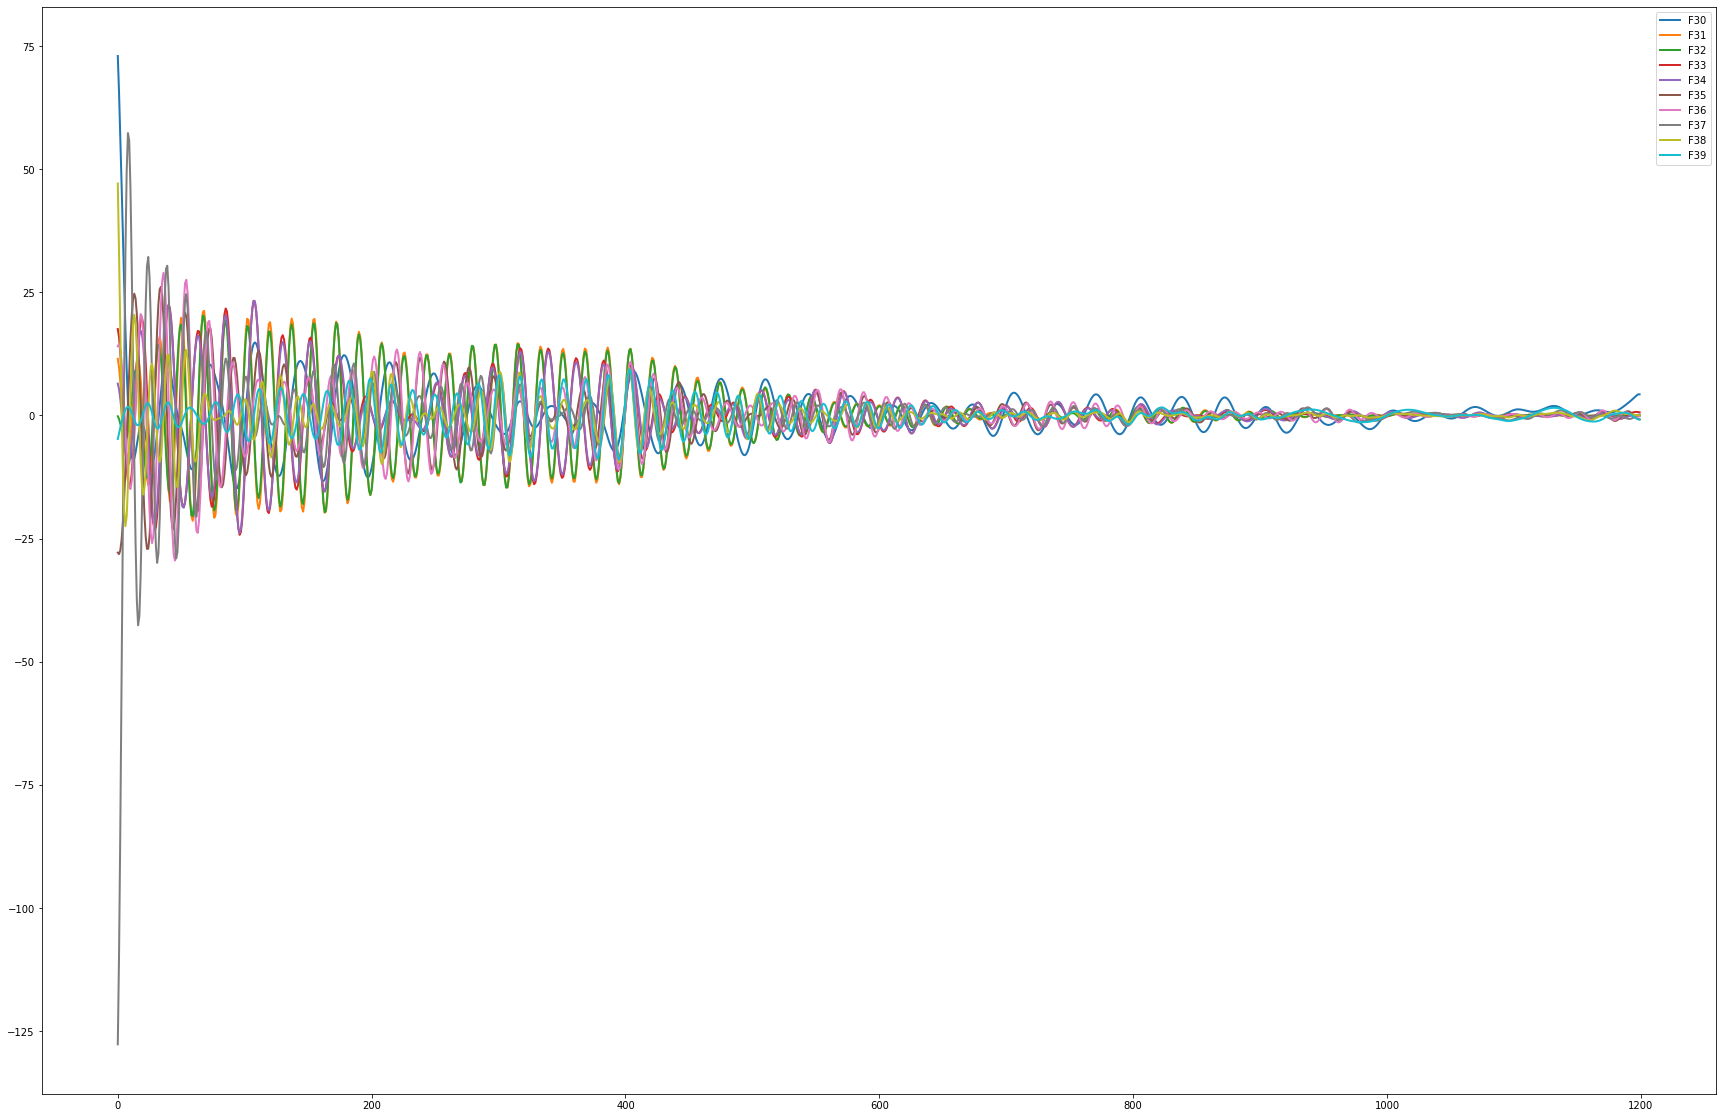

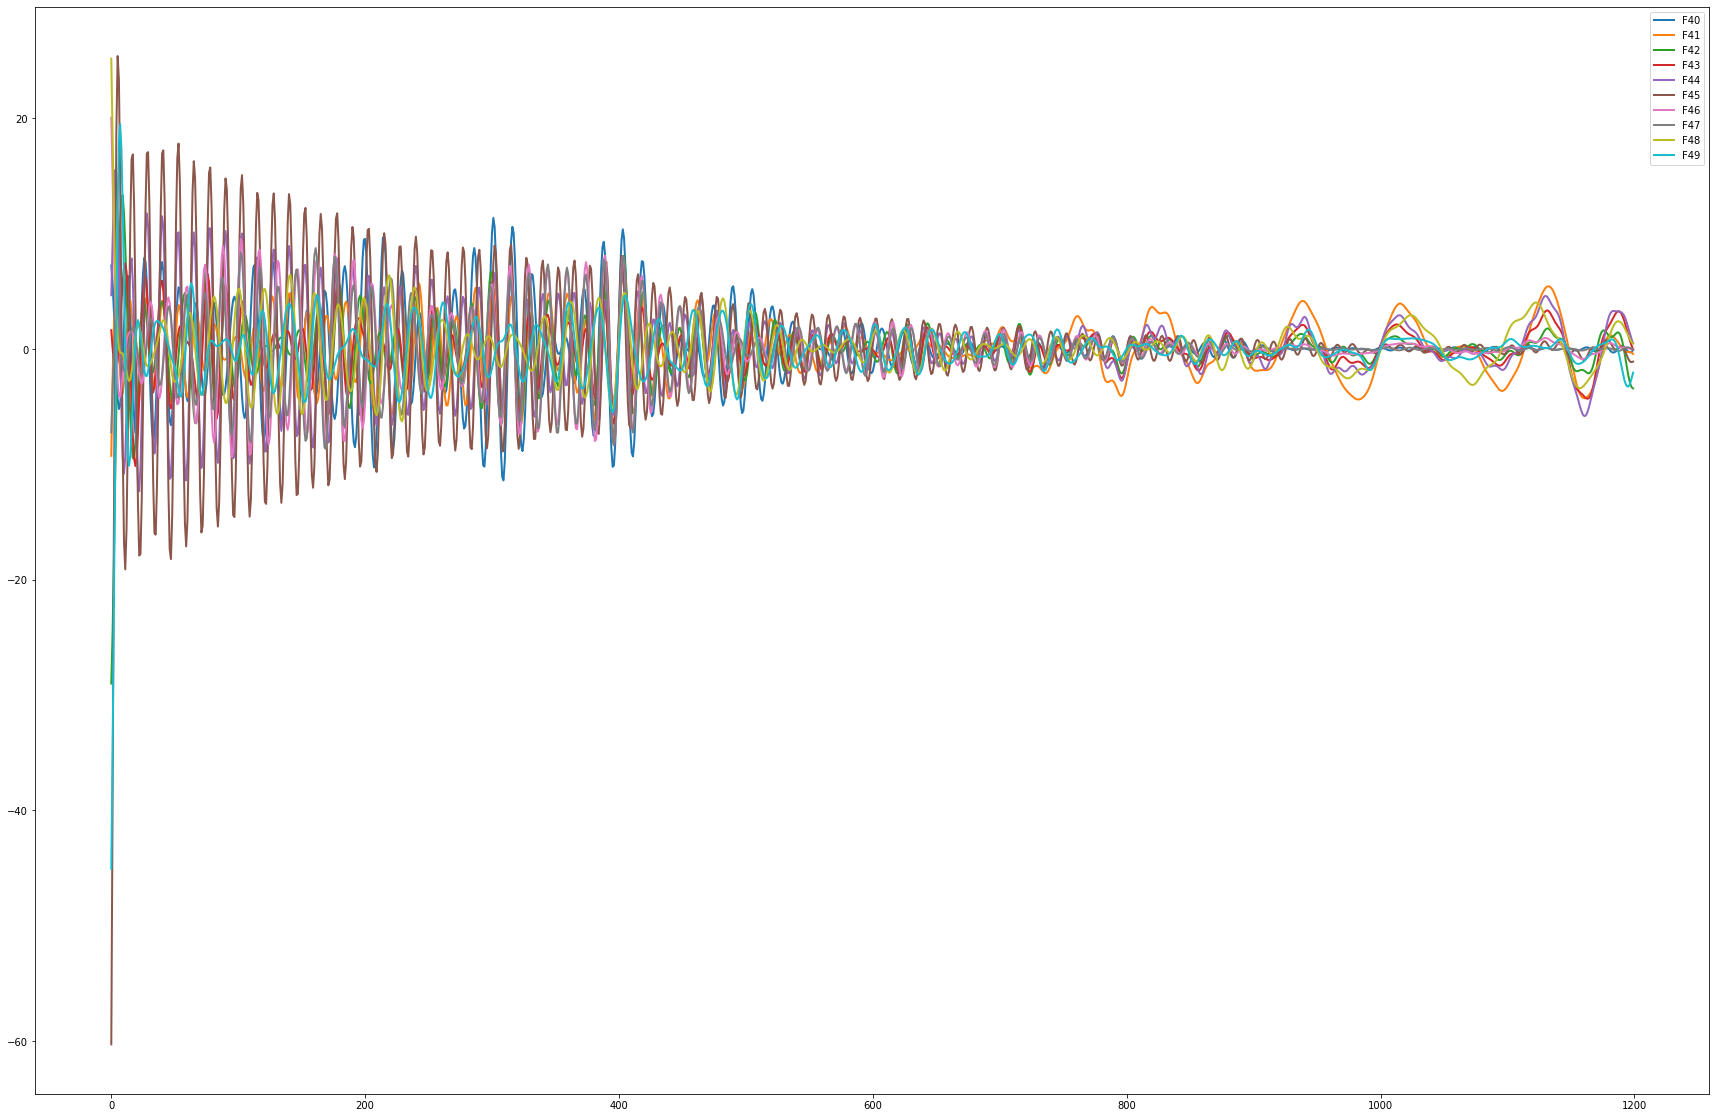

In [ ]:
#Channel 1 in sample 1 in all trials (To be iterated 32 times and then 550 times)(550*32*5[])
channel1_sample1 = []
for i in range(m):
    channel1_sample1.append(ts[i][0][0])
print(channel1_sample1)
print(len(channel1_sample1))
X = build_traj_mat(channel1_sample1) #Trajectory matrix
print(X)
d, s, U, E, V = svd_(X) #SVD
X_elem = elem_matrices(X, d) #Elementary matrices
plot_contributions(s)

#Plot reconstructed signals from elementary matices (Checking before grouping)
plt.figure(figsize = (30,20))
for i in range(10):
    F = X_to_TS(X_elem[i])
    plt.plot(range(len(F)), F, lw = 2, label = f'F{i}')
plt.legend()

plt.figure(figsize = (30,20))
for i in range(10, 20):
    F = X_to_TS(X_elem[i])
    plt.plot(range(len(F)), F, lw = 2, label = f'F{i}')
plt.legend()

plt.figure(figsize = (30,20))
for i in range(20, 30):
    F = X_to_TS(X_elem[i])
    plt.plot(range(len(F)), F, lw = 2, label = f'F{i}')
plt.legend()

plt.figure(figsize = (30,20))
for i in range(30, 40):
    F = X_to_TS(X_elem[i])
    plt.plot(range(len(F)), F, lw = 2, label = f'F{i}')
plt.legend()

plt.figure(figsize = (30,20))
for i in range(40, 50):
    F = X_to_TS(X_elem[i])
    plt.plot(range(len(F)), F, lw = 2, label = f'F{i}')
plt.legend()

In [ ]:
'''
Data Structure
[[32] [] [] 550
 [32] [] []
 [32] [] []
 1200
]
'''

'\nData Structure\n[[32] [] [] 550\n [32] [] []\n [32] [] []\n 1200\n]\n'